# Big Data 분석1

## 데이터 정제

## Step 0 패키지 불러오기

In [1]:
# 데이터 구성 패키지:Series, DataFrame
import pandas as pd
# 행렬 연산 패키지
import numpy as np
# Scaling 클래스
from sklearn.preprocessing import scale, minmax_scale, robust_scale

# matploblib 이용한 Background 그래프 실행 및 결과 확인
%matplotlib inline

## Step 1 데이터 불러오기

In [2]:
# engine: 파일명 또는 데이터에 한글 포함 -> "python" 사용
# df_raw = pd.read_csv("/home/pirl/test/BigData/FITNESS_결측.csv", engine = "python")
df_raw = pd.read_csv("/home/pirl/test/BigData/FITNESS_결측.csv", encoding='euc-kr')
df_raw.head()

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.15,59.571,8.17,166,40,172
1,Gracie,NaN,38,30대,81.87,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.84,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.87,54.625,8.92,146,48,155
4,Chris,남성,49,40대,NaN,49.156,8.95,180,44,185


In [3]:
# describe -> 연속형 변수만 보여준다.
df_raw.describe()

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
count,31.000000,29.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,46.838710,77.178276,47.375806,10.586129,169.645161,56.677419,173.774194
std,5.860016,8.554578,5.327231,1.387414,10.251986,17.822060,9.164095
min,37.000000,59.080000,37.388000,8.170000,146.000000,40.000000,155.000000
25%,43.000000,73.030000,44.964500,9.780000,163.000000,48.000000,168.000000
50%,48.000000,76.320000,46.774000,10.470000,170.000000,53.000000,172.000000
75%,51.000000,82.780000,50.131000,11.270000,176.000000,60.500000,180.000000
max,57.000000,91.630000,60.055000,14.030000,186.000000,144.000000,192.000000


## Step 2 결측치 확인

In [4]:
# 결측치 확인: pandas.DataFrame.isnull() 또는 pandas.DataFrame.isna()
df_raw.isnull().head()

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False


In [5]:
df_raw.isna().head() # isnull()과 동일

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,False,False,False,False,False,False,False,False,False,False
1,False,True,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,True,False,False,False,False,False


In [6]:
# 결측치 확인 - 변수별 결측 확인
# 결측치(True) 현황 요약: sum 함수
df_raw.isnull().sum()

NAME        0
GENDER      1
AGE         0
AGEGROUP    0
WEIGHT      2
OXY         0
RUNTIME     0
RUNPULSE    0
RSTPULSE    0
MAXPULSE    0
dtype: int64

In [7]:
# 범주형(문자) 변수 결측치 처리: GENDER 변수의 결측치에 "여성"으로 대체
# 문자형 결측치 처리: pandas.DataFrame.fillna(값, inplace: 결측치 입력 후 저장 여부)

# df_raw["GENDER"].fillna("여성", inplace = False)
df_raw["GENDER"].fillna("여성", inplace = True)
df_raw.head()

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.15,59.571,8.17,166,40,172
1,Gracie,여성,38,30대,81.87,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.84,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.87,54.625,8.92,146,48,155
4,Chris,남성,49,40대,NaN,49.156,8.95,180,44,185


In [8]:
# 연속형(숫자) 변수 결측치 처리: GENDER별 WEIGHT 평균 계산 및 대체
# 숫자형 결측치 처리: groupby(범주형 변수), agg("집계함수")
df_raw.groupby("GENDER")["WEIGHT"].agg("mean") # GENDER별 WEIGHT 변수의 평균

GENDER
남성    82.433077
여성    72.908750
Name: WEIGHT, dtype: float64

In [9]:
# 연속형(숫자) 변수 결측치 처리: WEIGHT 변수의 결측을 GENDER = "남자"의 WEIGHT 평균값으로 대체

# 숫자형 결측치 처리: transform("집계함수")
# 코드가 길어 행 바꿈 필요시 \ (won 표시) 끝에 추가
df_raw["WEIGHT"] = \
 df_raw["WEIGHT"].fillna(df_raw.groupby("GENDER")["WEIGHT"].transform("mean")).round(3)

In [10]:
df_raw.head()

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.150,59.571,8.17,166,40,172
1,Gracie,여성,38,30대,81.870,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.840,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.870,54.625,8.92,146,48,155
4,Chris,남성,49,40대,82.433,49.156,8.95,180,44,185


In [11]:
# 데이터 천처리를 한 후 결측치가 있는지 확인을 한다.
df_raw.isnull().sum()

NAME        0
GENDER      0
AGE         0
AGEGROUP    0
WEIGHT      0
OXY         0
RUNTIME     0
RUNPULSE    0
RSTPULSE    0
MAXPULSE    0
dtype: int64

In [12]:
df_raw.describe()

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
count,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000,31.000000
mean,46.838710,77.517290,47.375806,10.586129,169.645161,56.677419,173.774194
std,5.860016,8.368042,5.327231,1.387414,10.251986,17.822060,9.164095
min,37.000000,59.080000,37.388000,8.170000,146.000000,40.000000,155.000000
25%,43.000000,73.200000,44.964500,9.780000,163.000000,48.000000,168.000000
50%,48.000000,77.450000,46.774000,10.470000,170.000000,53.000000,172.000000
75%,51.000000,82.606500,50.131000,11.270000,176.000000,60.500000,180.000000
max,57.000000,91.630000,60.055000,14.030000,186.000000,144.000000,192.000000


In [13]:
# (추가) 결측치 처리 실습해 보기 (bfill:뒷값)
# 다른 결측 데이터 불러오기, 앞의 값, 뒤의 값을 넣는 것 실습
df_raw1 = pd.read_csv("/home/pirl/test/BigData/FITNESS_결측.csv", encoding='euc-kr')
df_raw1.head()

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.15,59.571,8.17,166,40,172
1,Gracie,NaN,38,30대,81.87,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.84,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.87,54.625,8.92,146,48,155
4,Chris,남성,49,40대,NaN,49.156,8.95,180,44,185


In [14]:
# 뒤의 값으로 대체
df_raw1.fillna(method = 'bfill', inplace= False).head(6)

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.15,59.571,8.17,166,40,172
1,Gracie,여성,38,30대,81.87,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.84,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.87,54.625,8.92,146,48,155
4,Chris,남성,49,40대,89.02,49.156,8.95,180,44,185
5,Allen,남성,38,30대,89.02,49.874,9.22,178,55,180


In [15]:
# 앞의 값으로 대체
df_raw1.fillna(method = 'ffill', inplace= False).head(6)

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.15,59.571,8.17,166,40,172
1,Gracie,여성,38,30대,81.87,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.84,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.87,54.625,8.92,146,48,155
4,Chris,남성,49,40대,70.87,49.156,8.95,180,44,185
5,Allen,남성,38,30대,89.02,49.874,9.22,178,55,180


In [16]:
# 결측치 삭제df_raw.dropna(axis=0, inplace = True)
df_raw2 = pd.read_csv("/home/pirl/test/BigData/FITNESS_결측.csv", encoding='euc-kr')

# df_raw1 = df_raw.dropna(axis=0)
df_raw2.dropna(axis=0, inplace = True)
# df_raw.dropna(axis=0, inplace = False)
df_raw2.head()

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.15,59.571,8.17,166,40,172
2,Luanne,여성,43,40대,85.84,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.87,54.625,8.92,146,48,155
5,Allen,남성,38,30대,89.02,49.874,9.22,178,55,180
6,Nancy,여성,49,40대,76.32,48.673,9.40,186,56,188


# step 3 이상치 확인 및 처리

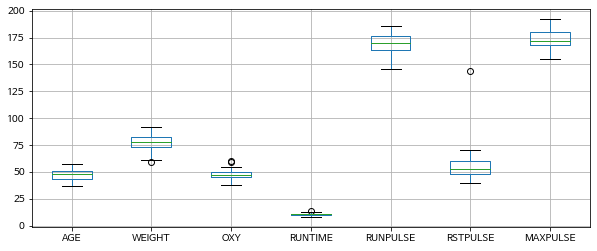

In [17]:
# boxploat: 상자수염도, figsize: 그래프 크기(x축, y축)
df_raw.boxplot(figsize = (10, 4))

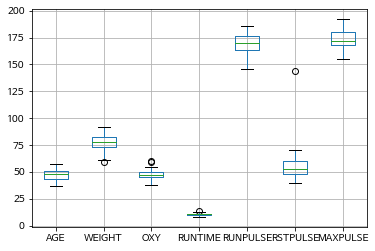

In [18]:
df_raw.boxplot()

In [19]:
# RSTPULSE 변수에서 이상치 (100보다 큰 값) 확인: True/False 표시
df_raw["RSTPULSE"] >= 100
df_raw.loc[27:29]

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
27,Mark,남성,57,50대,73.37,39.407,12.63,174,58,176
28,Steve,남성,54,50대,91.63,39.203,12.88,168,144,172
29,Vaughn,남성,44,40대,81.42,39.442,13.08,174,63,176


In [20]:
# 조건 해당 자료 직접 확인
df_raw[df_raw["RSTPULSE"]>=100]

# 복수 조건: &(and), |(or)
# df_raw[(df_raw["RSTPULSE"]>=100) & (df_raw["GENDER"]=="남성")]

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
28,Steve,남성,54,50대,91.63,39.203,12.88,168,144,172


In [21]:
# df_raw["RSTPULSE"]<100 가 True인 것만 뽑아내서 저장을 하겠다.
df_fitness = df_raw[df_raw["RSTPULSE"]<100]
df_fitness # 자료 수가 줄어듬

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.150,59.571,8.17,166,40,172
1,Gracie,여성,38,30대,81.870,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.840,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.870,54.625,8.92,146,48,155
4,Chris,남성,49,40대,82.433,49.156,8.95,180,44,185
5,Allen,남성,38,30대,89.020,49.874,9.22,178,55,180
6,Nancy,여성,49,40대,76.320,48.673,9.40,186,56,188
7,Patty,여성,52,50대,76.320,45.441,9.63,164,48,166
8,Suzanne,여성,57,50대,59.080,50.545,9.93,148,49,155
9,Teresa,여성,51,50대,77.910,46.672,10.00,162,48,168


In [22]:
# 자료 index reset: DataFrame.reset_index
df_fitness.reset_index(drop = True, inplace = True)
df_fitness

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.150,59.571,8.17,166,40,172
1,Gracie,여성,38,30대,81.870,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.840,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.870,54.625,8.92,146,48,155
4,Chris,남성,49,40대,82.433,49.156,8.95,180,44,185
5,Allen,남성,38,30대,89.020,49.874,9.22,178,55,180
6,Nancy,여성,49,40대,76.320,48.673,9.40,186,56,188
7,Patty,여성,52,50대,76.320,45.441,9.63,164,48,166
8,Suzanne,여성,57,50대,59.080,50.545,9.93,148,49,155
9,Teresa,여성,51,50대,77.910,46.672,10.00,162,48,168


In [23]:
df_raw3 = pd.read_csv("/home/pirl/test/BigData/FITNESS_결측.csv", encoding='euc-kr')
df_raw3.head()

df_raw3.loc[df_raw3["RSTPULSE"]>=100, "RSTPULSE"] = np.nan

In [24]:
print(df_raw3)

        NAME GENDER  AGE AGEGROUP  WEIGHT     OXY  RUNTIME  RUNPULSE  \
0      Donna     여성   42      40대   68.15  59.571     8.17       166   
1     Gracie    NaN   38      30대   81.87  60.055     8.63       170   
2     Luanne     여성   43      40대   85.84  54.297     8.65       156   
3       Mimi     여성   50      50대   70.87  54.625     8.92       146   
4      Chris     남성   49      40대     NaN  49.156     8.95       180   
5      Allen     남성   38      30대   89.02  49.874     9.22       178   
6      Nancy     여성   49      40대   76.32  48.673     9.40       186   
7      Patty     여성   52      50대   76.32  45.441     9.63       164   
8    Suzanne     여성   57      50대   59.08  50.545     9.93       148   
9     Teresa     여성   51      50대   77.91  46.672    10.00       162   
10       Bob     남성   39      30대   75.07  45.313    10.07       185   
11  Harriett     여성   49      40대   73.37  50.388    10.08       168   
12      Jane     여성   44      40대   73.03  50.541    10.13      

In [25]:
df_raw3.isnull().sum()

NAME        0
GENDER      1
AGE         0
AGEGROUP    0
WEIGHT      2
OXY         0
RUNTIME     0
RUNPULSE    0
RSTPULSE    1
MAXPULSE    0
dtype: int64

In [26]:
df_raw3.groupby("GENDER")["RSTPULSE"].agg("mean") # GENDER별 WEIGHT 변수의 평균

GENDER
남성    56.571429
여성    51.533333
Name: RSTPULSE, dtype: float64

In [27]:
df_raw3["RSTPULSE"] = \
 df_raw3["RSTPULSE"].fillna(df_raw3.groupby("GENDER")["RSTPULSE"].transform("mean")).round(3)

In [28]:
df_raw3

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.15,59.571,8.17,166,40.000,172
1,Gracie,NaN,38,30대,81.87,60.055,8.63,170,48.000,186
2,Luanne,여성,43,40대,85.84,54.297,8.65,156,45.000,168
3,Mimi,여성,50,50대,70.87,54.625,8.92,146,48.000,155
4,Chris,남성,49,40대,NaN,49.156,8.95,180,44.000,185
5,Allen,남성,38,30대,89.02,49.874,9.22,178,55.000,180
6,Nancy,여성,49,40대,76.32,48.673,9.40,186,56.000,188
7,Patty,여성,52,50대,76.32,45.441,9.63,164,48.000,166
8,Suzanne,여성,57,50대,59.08,50.545,9.93,148,49.000,155
9,Teresa,여성,51,50대,77.91,46.672,10.00,162,48.000,168


In [29]:
df_raw3.isnull().sum()

NAME        0
GENDER      1
AGE         0
AGEGROUP    0
WEIGHT      2
OXY         0
RUNTIME     0
RUNPULSE    0
RSTPULSE    0
MAXPULSE    0
dtype: int64

In [30]:
df_raw3["WEIGHT"] = \
 df_raw3["WEIGHT"].fillna(df_raw3.groupby("GENDER")["WEIGHT"].transform("mean")).round(3)

df_raw3["GENDER"].fillna("여성", inplace = True)

print(df_raw3)

        NAME GENDER  AGE AGEGROUP  WEIGHT     OXY  RUNTIME  RUNPULSE  \
0      Donna     여성   42      40대  68.150  59.571     8.17       166   
1     Gracie     여성   38      30대  81.870  60.055     8.63       170   
2     Luanne     여성   43      40대  85.840  54.297     8.65       156   
3       Mimi     여성   50      50대  70.870  54.625     8.92       146   
4      Chris     남성   49      40대  82.433  49.156     8.95       180   
5      Allen     남성   38      30대  89.020  49.874     9.22       178   
6      Nancy     여성   49      40대  76.320  48.673     9.40       186   
7      Patty     여성   52      50대  76.320  45.441     9.63       164   
8    Suzanne     여성   57      50대  59.080  50.545     9.93       148   
9     Teresa     여성   51      50대  77.910  46.672    10.00       162   
10       Bob     남성   39      30대  75.070  45.313    10.07       185   
11  Harriett     여성   49      40대  73.370  50.388    10.08       168   
12      Jane     여성   44      40대  73.030  50.541    10.13      

# step 4 Scale 변환
scale 변환 대상 변수 = 숫자형 변수 (문자형 변수는 적용 안됨)

In [31]:
# select_dtypes 조건으로 변수 유형 선택: select_dtypes = "object"-문자형 변수
# 숫자형 변수 선택: select_dtypes="object"제외
df_fitness_num = df_fitness.select_dtypes(exclude = "object")
df_fitness_num.head()
# [숫자형] scale 변환 대상 변수

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,42,68.150,59.571,8.17,166,40,172
1,38,81.870,60.055,8.63,170,48,186
2,43,85.840,54.297,8.65,156,45,168
3,50,70.870,54.625,8.92,146,48,155
4,49,82.433,49.156,8.95,180,44,185


In [32]:
# 문자형 변수 선택: select_dtypes = "object" 선택
df_fitness_char = df_fitness.select_dtypes(include = "object")
df_fitness_char.head()
# 문자형

,NAME,GENDER,AGEGROUP
0,Donna,여성,40대
1,Gracie,여성,30대
2,Luanne,여성,40대
3,Mimi,여성,50대
4,Chris,남성,40대


In [33]:
# scale변환: 평균, 표준편차 기준
df_scale_std = scale(df_fitness_num)
# scale 적용/변환하면 numpy의 ndarray 형태로 저장 -> DataFrame으로 변환
df_scale_std = pd.DataFrame(df_scale_std, columns = df_fitness_num.columns)
df_scale_std.head()

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,-0.805985,-1.119445,2.334717,-1.771826,-0.361066,-1.856653,-0.200185
1,-1.506841,0.606869,2.429494,-1.423469,0.029276,-0.777726,1.328503
2,-0.630771,1.106393,1.301962,-1.408323,-1.336919,-1.182324,-0.636953
3,0.595728,-0.777202,1.366191,-1.203852,-2.312773,-0.777726,-2.056450
4,0.420514,0.677708,0.295251,-1.181133,1.005129,-1.317190,1.219311


In [34]:
# scale 변환 결과 확인: 요약통계량: pandas.DataFrame.describe()
df_scale_desc = df_scale_std.describe()
df_scale_desc.round(3)

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
count,30.000,30.000,30.000,30.000,30.000,30.000,30.000
mean,-0.000,0.000,0.000,0.000,0.000,0.000,-0.000
std,1.017,1.017,1.017,1.017,1.017,1.017,1.017
min,-1.682,-2.261,-2.009,-1.772,-2.313,-1.857,-2.056
25%,-0.631,-0.495,-0.486,-0.609,-0.703,-0.778,-0.637
50%,0.158,-0.020,-0.122,-0.083,0.029,-0.171,-0.200
75%,0.771,0.678,0.511,0.491,0.615,0.672,0.673
max,1.822,1.835,2.429,2.666,1.591,2.189,1.984


In [35]:
# scale변환: 최소, 최대값 기준
df_scale_minmax = minmax_scale(df_fitness_num)
# scale 적용/변환하면 numpy의 ndarray 형태로 저장 -> DataFrame으로 변환
df_scale_minmax = pd.DataFrame(df_scale_minmax, columns = df_fitness_num.columns)
df_scale_minmax.head()

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,0.25,0.278648,0.978647,0.000000,0.50,0.000000,0.459459
1,0.05,0.700154,1.000000,0.078498,0.60,0.266667,0.837838
2,0.30,0.822120,0.745974,0.081911,0.25,0.166667,0.351351
3,0.65,0.362212,0.760445,0.127986,0.00,0.266667,0.000000
4,0.60,0.717450,0.519169,0.133106,0.85,0.133333,0.810811


In [36]:
# scale변환: 로버스트 기준
df_scale_robust = robust_scale(df_fitness_num)
# scale 적용/변환하면 numpy의 ndarray 형태로 저장 -> DataFrame으로 변환
df_scale_robust = pd.DataFrame(df_scale_robust, columns = df_fitness_num.columns)
df_scale_robust.head()

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,-0.6875,-0.937433,2.463797,-1.535284,-0.296296,-1.162791,0.000000
1,-1.1875,0.534986,2.558834,-1.218589,0.000000,-0.418605,1.166667
2,-0.5625,0.961043,1.428207,-1.204819,-1.037037,-0.697674,-0.333333
3,0.3125,-0.645525,1.492612,-1.018933,-1.777778,-0.418605,-1.416667
4,0.1875,0.595407,0.418733,-0.998279,0.740741,-0.790698,1.083333


In [37]:
# scale 변환 결과 확인: 요약통계량: pandas.DataFrame.describe()
df_scale_desc = df_scale_robust.describe()
df_scale_desc.round(3)

,AGE,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
count,30.000,30.000,30.000,30.000,30.000,30.000,30.000
mean,-0.112,0.017,0.123,0.076,-0.022,0.118,0.153
std,0.726,0.868,1.020,0.925,0.772,0.702,0.776
min,-1.312,-1.911,-1.892,-1.535,-1.778,-1.163,-1.417
25%,-0.562,-0.405,-0.365,-0.478,-0.556,-0.419,-0.333
50%,0.000,0.000,0.000,0.000,0.000,0.000,0.000
75%,0.438,0.595,0.635,0.522,0.444,0.581,0.667
max,1.188,1.582,2.559,2.499,1.185,1.628,1.667


In [38]:
# Scale 변환 결과 비교
df_rstpulse = pd.DataFrame()
df_rstpulse["Raw"] = df_fitness_num["RSTPULSE"] #df_fitness 사용 가능(동일)
df_rstpulse["Standard"] = df_scale_std["RSTPULSE"] 
df_rstpulse["MinMax"] = df_scale_minmax["RSTPULSE"]
df_rstpulse["Robust"] = df_scale_robust["RSTPULSE"] 
df_rstpulse.head().round(3)

,Raw,Standard,MinMax,Robust
0,40,-1.857,0.000,-1.163
1,48,-0.778,0.267,-0.419
2,45,-1.182,0.167,-0.698
3,48,-0.778,0.267,-0.419
4,44,-1.317,0.133,-0.791


In [39]:
df_rstpulse.describe().round(3)

,Raw,Standard,MinMax,Robust
count,30.000,30.000,30.000,30.000
mean,53.767,0.000,0.459,0.118
std,7.542,1.017,0.251,0.702
min,40.000,-1.857,0.000,-1.163
25%,48.000,-0.778,0.267,-0.419
50%,52.500,-0.171,0.417,0.000
75%,58.750,0.672,0.625,0.581
max,70.000,2.189,1.000,1.628


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fab96c3cf50>,
      dtype=object)

/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


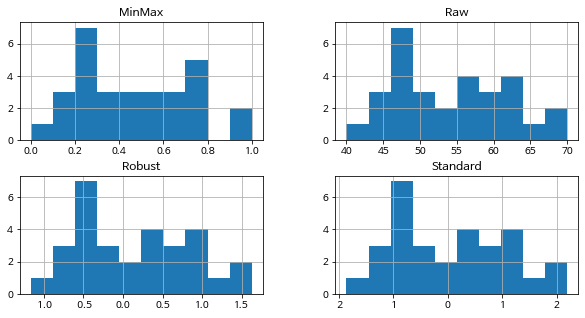

In [40]:
# pandas의 DataFrame.hist 이용 (figsize = (x축 크기, y축 크기))
df_rstpulse[["Raw", "Standard", "MinMax", "Robust"]].hist(figsize = (10, 5))

# 탐색적 분석 - 그래프

In [41]:
# 데이터 구성 패키지:Series, DataFrame
import pandas as pd
# 행렬 연산 패키지
import numpy as np
# 데이터 시각화 패키지
import matplotlib
import matplotlib.pyplot as plt
# 데이터 시각화(추세 등) 패키지
import seaborn as sns

In [46]:
# FITNESS.CSV 데이터 가져오기
# df_raw = pd.read_csv("/home/pirl/test/BigData/FITNESS.csv", engine = "python")
df_fitness = pd.read_csv("/home/pirl/test/BigData/FITNESS.csv", encoding='euc-kr')
df_fitness.head()

,NAME,GENDER,AGE,AGEGROUP,WEIGHT,OXY,RUNTIME,RUNPULSE,RSTPULSE,MAXPULSE
0,Donna,여성,42,40대,68.15,59.571,8.17,166,40,172
1,Gracie,여성,38,30대,81.87,60.055,8.63,170,48,186
2,Luanne,여성,43,40대,85.84,54.297,8.65,156,45,168
3,Mimi,여성,50,50대,70.87,54.625,8.92,146,48,155
4,Chris,남성,49,40대,81.42,49.156,8.95,180,44,185


In [47]:
# 환율.CSV 데이터 가져오기. 파일 이름에 한글 포함되어 있는 경우
# engine = "python" 지정, parse_dates: 날짜 변수 지정
df_currency = pd.read_csv("/home/pirl/test/BigData/환율.csv", engine = "python", parse_dates = ["APPL_DATE"])
df_currency.head()

,CURRENCY,APPL_DATE,STD_RATE,USD_CONV_DATE
0,CNY,2016-01-01,181.48,0.1541
1,JPY,2016-01-01,976.99,0.8294
2,USD,2016-01-01,1178.00,1.0000
3,CNY,2016-01-02,181.48,0.1541
4,JPY,2016-01-02,976.99,0.8294


## 그래프 분석

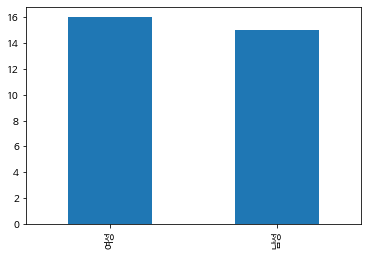

In [48]:
# DataFrame["변수"].value_counts(): 개별(1개) 범주형 변수의 자료 수 계산
# 성별 Bar Chart
df_count = df_fitness["GENDER"].value_counts()
df_count.plot.bar()

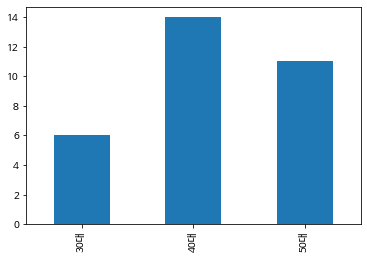

In [49]:
# 연령대 Bar Chart
df_count = df_fitness["AGEGROUP"].value_counts()
# sort_index(inplace = True): 정렬 결과를 저장
df_count.sort_index(inplace = True)
df_count.plot.bar()

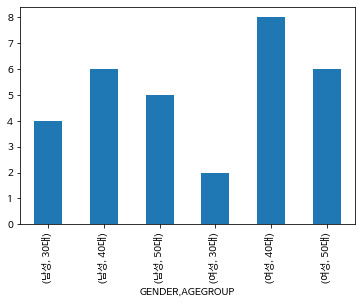

In [50]:
# DataFrame["변수", ...].size() : 복수(1개 이상)의 범주형 변수의 자료 수 통합 계산
# 성별 + 연령대 Bar Chart
# groupby (column): column기준 자료 요약, as_index: groupby 변수의 index로 사용 여부
df_group_total = df_fitness.groupby(["GENDER", "AGEGROUP"], as_index = False).size()
# df_groupby_total = df_fitness.groupby(["GENDER", "AGEGROUP"], as_index = False).agg("count") #위와 동일
df_group_total.plot.bar()

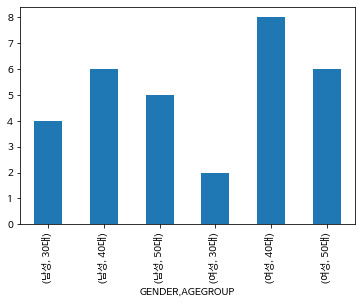

In [51]:
df_groupby_total = df_fitness.groupby(["GENDER", "AGEGROUP"], as_index = False).agg("count") #위와 동일
df_group_total.plot.bar()

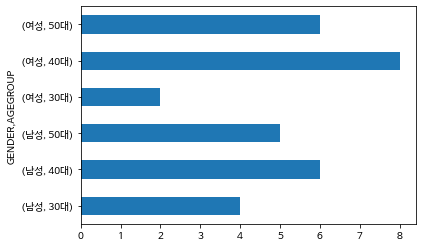

In [52]:
# barh는 그래프를 수평(가로)로 그려준다.
df_group_total.plot.barh()

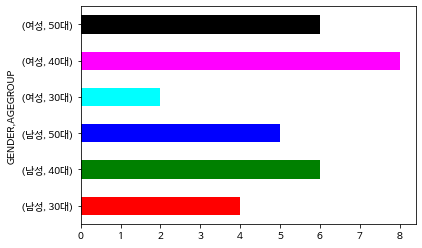

In [53]:
# barh는 그래프를 수평(가로)로 그려준다. + 색깔을 입혀준다.
df_group_total.plot.barh(color = ['red', 'green', 'blue', 'cyan', 'magenta', 'black'])

## step 1 Histogram 생성: 혈당 산소 요구량(OXY)

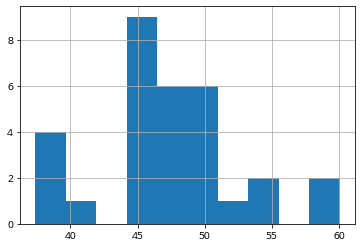

In [54]:
# pandas의 DataFrame.hist method 이용: OXY에 대한 히스토그램 생성
df_fitness["OXY"].hist()

## step 2 Histogram 생성: 숫자형 변수

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fab963f1090>,
      dtype=object)

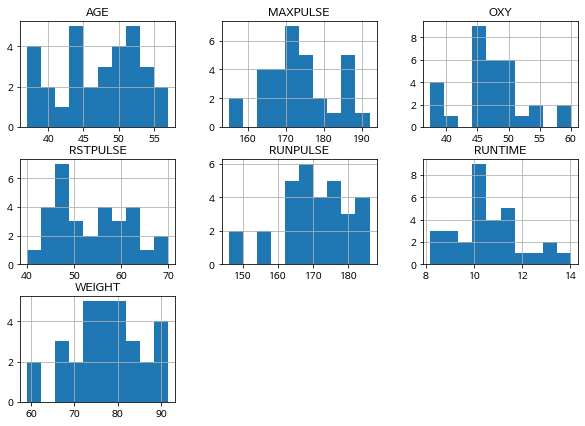

In [55]:
#hist(figsiz) :figsize = (x축 크기, y축 크기) - 그래프 영역별 중첩 처리
df_fitness.hist(figsize = (10,7))

## step 3 Histogram 생성: 성별 혈당 산소 요구량

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7fab95f06510>,
      dtype=object)

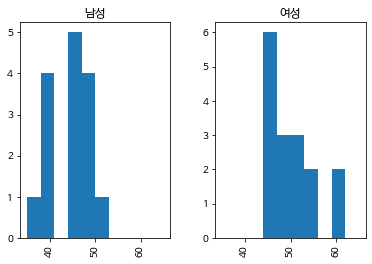

In [56]:
# hist(column = 변수, by = 그룹변수, range(최소값, 최대값)) - X축 범위 통일
df_fitness.hist(column= "OXY", by = "GENDER", range=(35, 65))

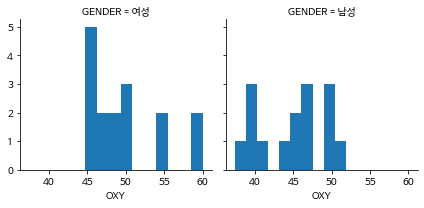

In [57]:
# seaborn 사용, FacetGrid(데이터 지정, col= 컬럼 지정): 지정된 컬럼의 범주별 그리드 영역 생성, Y축 범위 동일
grid = sns.FacetGrid(df_fitness, col = "GENDER")
# map(함수, 문자형 컴럼명): 범주별 히스토그램 생성
grid.map(plt.hist, "OXY")

## step 4 Histogram 생성: 성별 혈당 산소 요구량 중첩

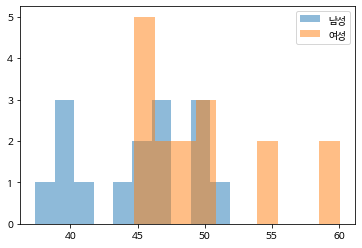

In [58]:
# matplotlib.pyplot, hist mehtod 이용하여 중첩 histogram 생성
# hist(변수, label = "표시 값", alpha = 투명도(0~1 지정))
plt.hist(df_fitness[df_fitness["GENDER"] == "남성"]["OXY"], label = "남성", alpha = 0.5)
plt.hist(df_fitness[df_fitness["GENDER"] == "여성"]["OXY"], label = "여성", alpha = 0.5)
plt.legend()

# step 5 Histogram 생성: X축의 구간(bin)수를 변경

(array([4., 1., 0., 9., 6., 6., 1., 2., 0., 2.]),
 array([37.388 , 39.6547, 41.9214, 44.1881, 46.4548, 48.7215, 50.9882,
        53.2549, 55.5216, 57.7883, 60.055 ]),
 <a list of 10 Patch objects>)

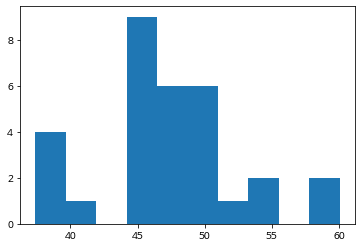

In [59]:
# hist(변수, data)
plt.hist(x = "OXY", data= df_fitness)

(array([1., 3., 0., 1., 0., 0., 5., 4., 4., 2., 2., 4., 1., 0., 1., 1., 0.,
        0., 0., 2.]),
 array([37.388  , 38.52135, 39.6547 , 40.78805, 41.9214 , 43.05475,
        44.1881 , 45.32145, 46.4548 , 47.58815, 48.7215 , 49.85485,
        50.9882 , 52.12155, 53.2549 , 54.38825, 55.5216 , 56.65495,
        57.7883 , 58.92165, 60.055  ]),
 <a list of 20 Patch objects>)

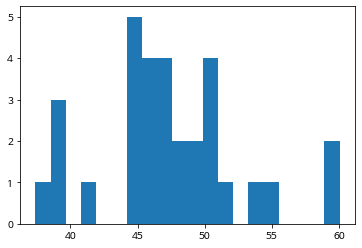

In [60]:
# x축 구간(bin) 조정(상세 분포 확인)
plt.hist(x = "OXY", data= df_fitness, bins = 20)

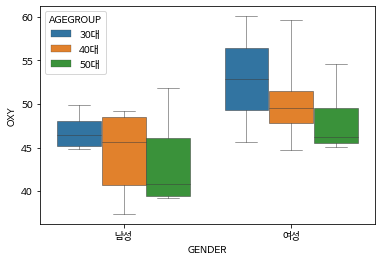

In [61]:
# seaborn으로 boxplot 그리기
sns.boxplot(x="GENDER", y = "OXY", hue = "AGEGROUP", data = df_fitness, \
            order= ["남성", "여성"], hue_order= ["30대", "40대", "50대"], linewidth = 0.5, \
            whis = 3)
plt.show()

# 그래프 분석_Pie Chart

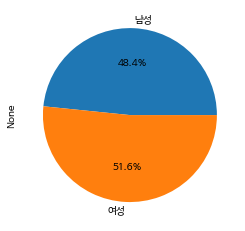

In [62]:
#성별 Pie Chart
# groupby(column): column기준 자료 요약.(size: group별 자료 수)
df_count = df_fitness.groupby(["GENDER"]).size()
# pie(데이터, labels = 레이블 변수 지정, autopct = 비율 %로 표시 (%.1f%%: 소수점 1자리 적용))
df_count.plot.pie(y = "OXY", autopct = "%.1f%%")

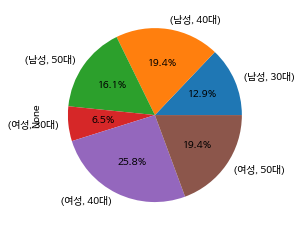

In [63]:
# 성별+연령대 Pie Chart
# groupby(column):column기준 자료 요약.(size : group별 자료 수)
df_count = df_fitness.groupby(["GENDER", "AGEGROUP"]).size()
# pie(데이터,labels = 레이블 변수 지정, autopct =비율 %로 표시(%.1f%%: 소수점 1자리 적용))
df_count.plot.pie(y= "OXY", autopct = "%.1f%%")

# 그래프 분석_Scatter plot

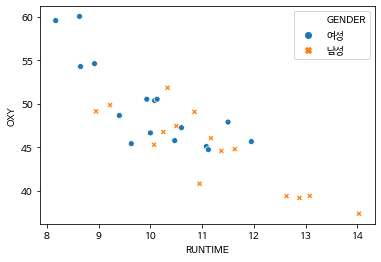

In [64]:
# seaborn.scatterplot method 이용
# scatterplot(x, y, hue: 그룹 변수, style : 그룹별 marker 구분, data )
sns.scatterplot(x = "RUNTIME", y = "OXY", hue = "GENDER", style = "GENDER", data = df_fitness)

# 그래프 분석_Scatter Matrix

## step 1 Scatter Matrix 생성

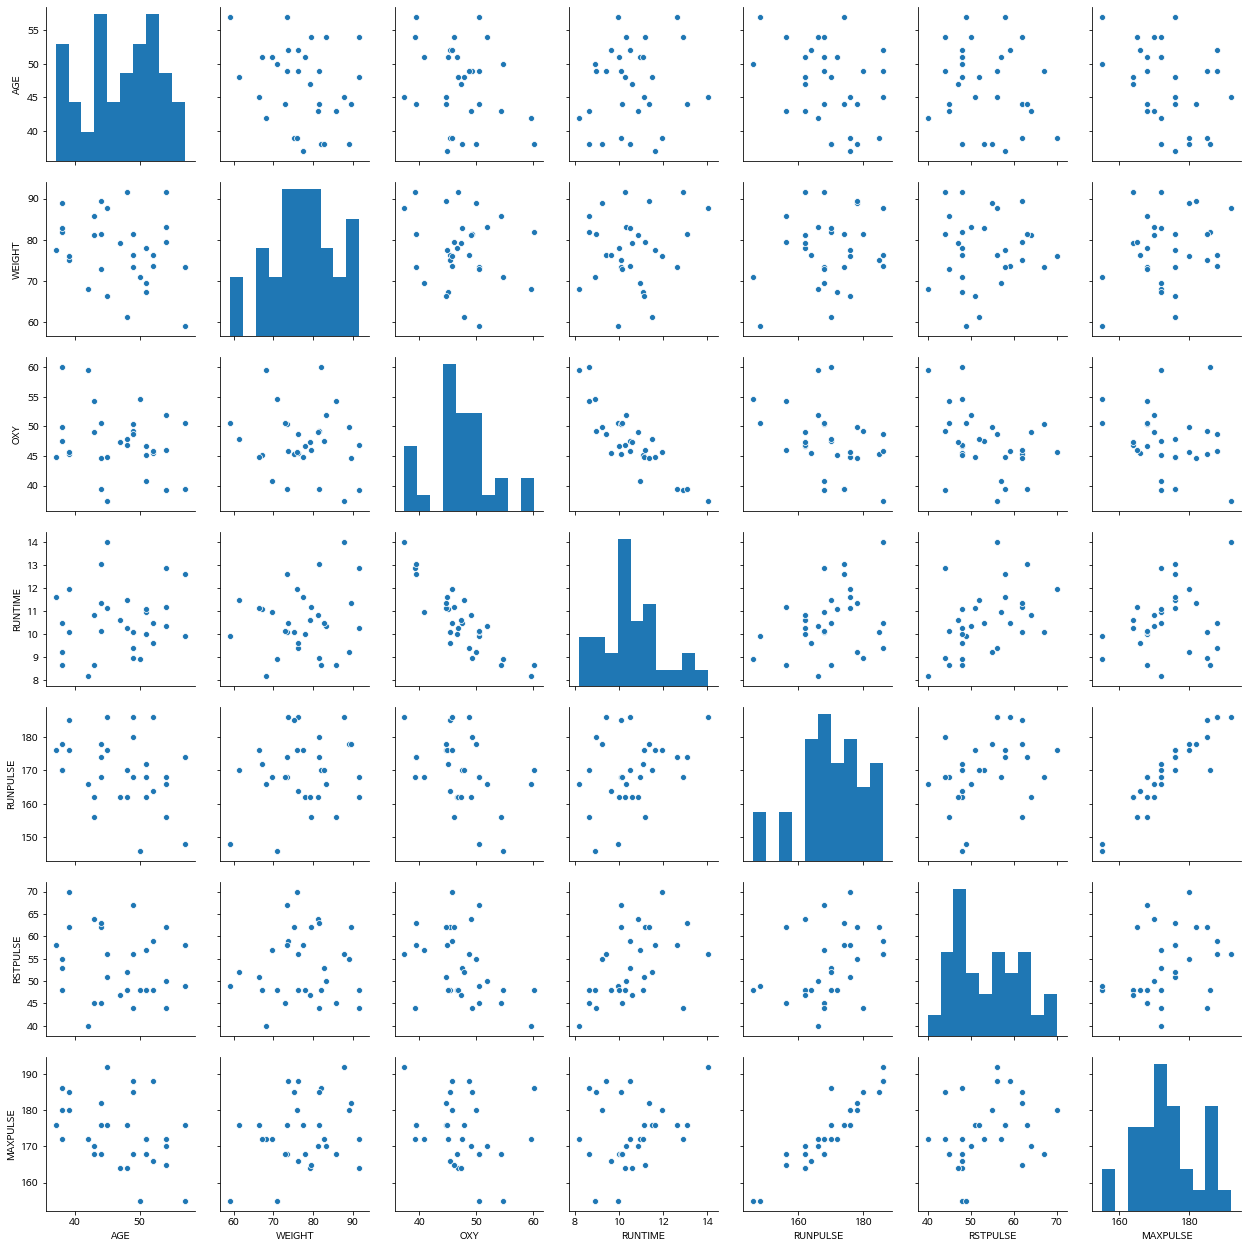

In [65]:
# 전체 변수 간의 관계 Scatter Matrix 생성
# pairplot(데이터): Scatter Plot 그래프 생성
sns.pairplot(df_fitness)

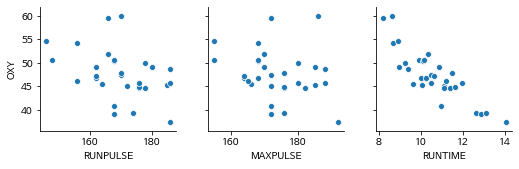

In [66]:
# y변수: 혈당산소 요구량, x변수: 맥박(운동), 맥박(최단), 운동시간 Scatter Matrix 생성
# pairplot(데이터, y_vars = y축 변수, x_vars = x축 변수 ): Scatter Plot 그래프 생성
sns.pairplot(df_fitness, y_vars = ["OXY"], x_vars = ["RUNPULSE", "MAXPULSE", "RUNTIME"])

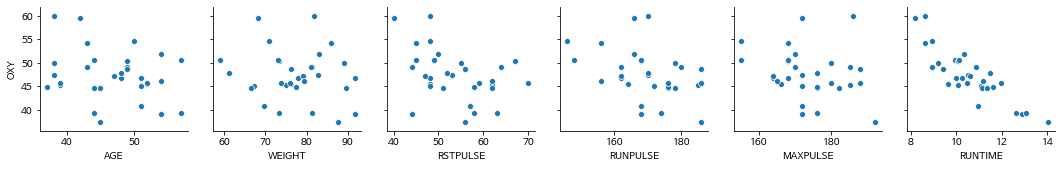

In [67]:
sns.pairplot(df_fitness, y_vars = ["OXY"], x_vars = ["AGE", "WEIGHT", "RSTPULSE", "RUNPULSE", "MAXPULSE", "RUNTIME"])

# 그래프 분석_Trend Chart

In [68]:
# Pivot 활용하여 각국 통화 별 데이터 생성
df_currency_pivot = df_currency.pivot(index = "APPL_DATE", columns = "CURRENCY", values = "STD_RATE")
df_currency_pivot.head()

CURRENCY,CNY,JPY,USD
APPL_DATE,,,
2016-01-01,181.48,976.99,1178.0
2016-01-02,181.48,976.99,1178.0
2016-01-03,181.48,976.99,1178.0
2016-01-04,181.10,992.62,1184.0
2016-01-05,181.94,993.00,1185.0


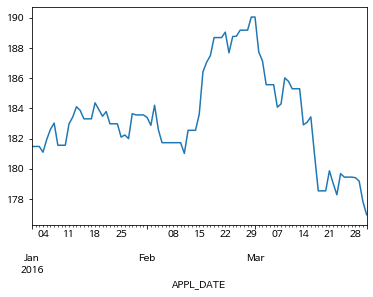

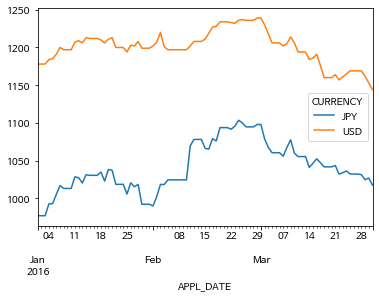

In [69]:
# 중국 위안화 별도 그림(엔화, 달러와 단위 차이)
df_currency_pivot["CNY"].plot()

# 일본 엔화, 미국 달러
df_currency_pivot[["JPY", "USD"]].plot()

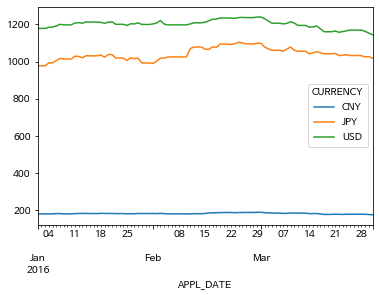

In [70]:
# 중국 위안화 일본 엔화, 미국 달러
df_currency_pivot[["CNY","JPY", "USD"]].plot()

# scale이 달라서 한 눈에 보기 힘들다.
# -> scaling 필요성이 있다.

/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:211: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/pirl/anaconda3/lib/python3.7/site-packages/matplotlib/backends/backend_agg.py:180: RuntimeWarning: Glyph 8722 missing from current font.
  font.set_text(s, 0, flags=flags)


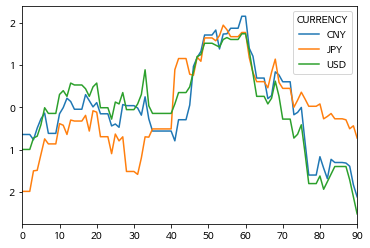

In [71]:
# (추가) Scaling 클래스
from sklearn.preprocessing import scale, minmax_scale, robust_scale

df_scale_std = scale(df_currency_pivot)
df_scale_std
# scale 작용/변환하면 numpy의 ndarray 형태로 저장 -> DataFrame으로 변환
df_scale_std = pd.DataFrame(df_scale_std, columns = df_currency_pivot.columns)
df_scale_std.head()

# scale 변환 결과 확인: 요약통계량 : pandas.DataFrame.describe()
# df_scale_std.describe().round(3)

df_scale_std[["CNY","JPY", "USD"]].plot()

In [72]:
corr = df_scale_std.corr(method = 'pearson')
print(corr)

CURRENCY       CNY       JPY       USD
CURRENCY                              
CNY       1.000000  0.671564  0.923140
JPY       0.671564  1.000000  0.586763
USD       0.923140  0.586763  1.000000


# 그래프 분석_Heatmap

## step 1 Heatmap 생성 : 성별 연령대별 혈당 산소 요구량

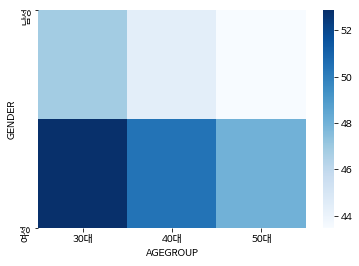

In [73]:
# 성별과 연령대별 혈당 산소 요구량 평균 계산, groupby: (성별, 연령), agg("mean"): 혈당 산소 요구량 평균값
df_agg = df_fitness.groupby(["GENDER", "AGEGROUP"], as_index = False).agg("mean")
# pivot(성별, 연령대, 혈당 산소 요구량): x축(연령대), y축(성별), 값(혈당산소요구량의 평균)으로 pivot
df_pivot = df_agg.pivot("GENDER", "AGEGROUP", "OXY")
# heatmap(데이터, cmap: 색상)
sns.heatmap(df_pivot, cmap = "Blues")

# 그래프 분석_Contour plot

## step 1 Contour Plot 생성: 운동시간과 혈당 산소 요구량

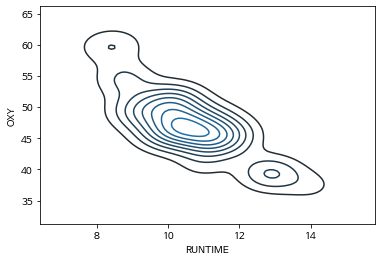

In [74]:
# kdeplot(x축, y축, shade: 음영 선택 여부)
sns.kdeplot(df_fitness["RUNTIME"], df_fitness["OXY"], shade = False)
# 파이썬에서는 X,Y축 값에 따른 밀도 수준을 표현

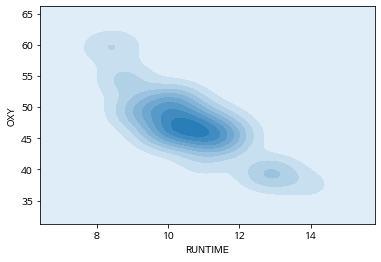

In [75]:
sns.kdeplot(df_fitness["RUNTIME"], df_fitness["OXY"], shade = True)

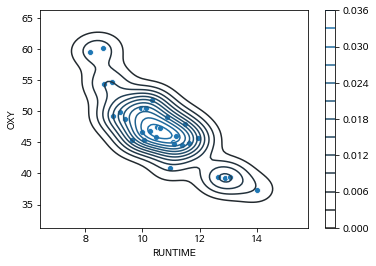

In [76]:
# kdeplot (x축, y축, shade: 음영 선택 여부)
# nlevel은 등고선의 간격
sns.kdeplot(df_fitness["RUNTIME"], df_fitness["OXY"], cbar = True , shade = False, n_levels = 11)
# 파이썬에서는 x,y축 값에 따른 밀도 수준을 표현
# print(df_fitness.describe())

sns.scatterplot(x = "RUNTIME", y = "OXY", data = df_fitness)
plt.show()

# 그래프 분석_Parallel Plot

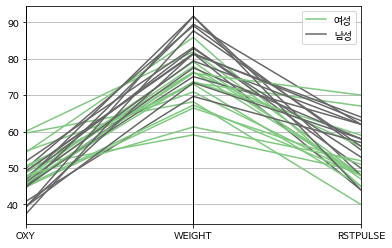

In [77]:
# parallel_coordinates(데이터, 그룹 변수, cols = 변수, colormap = 다양한 colormap 지정)
pd.plotting.parallel_coordinates(df_fitness, "GENDER", cols = ["OXY", "WEIGHT", "RSTPULSE"], colormap = "Accent")

# 그래프 분석_Customizing

Text(486.9227272727271, 0.5, '혈당 산소 요구량')

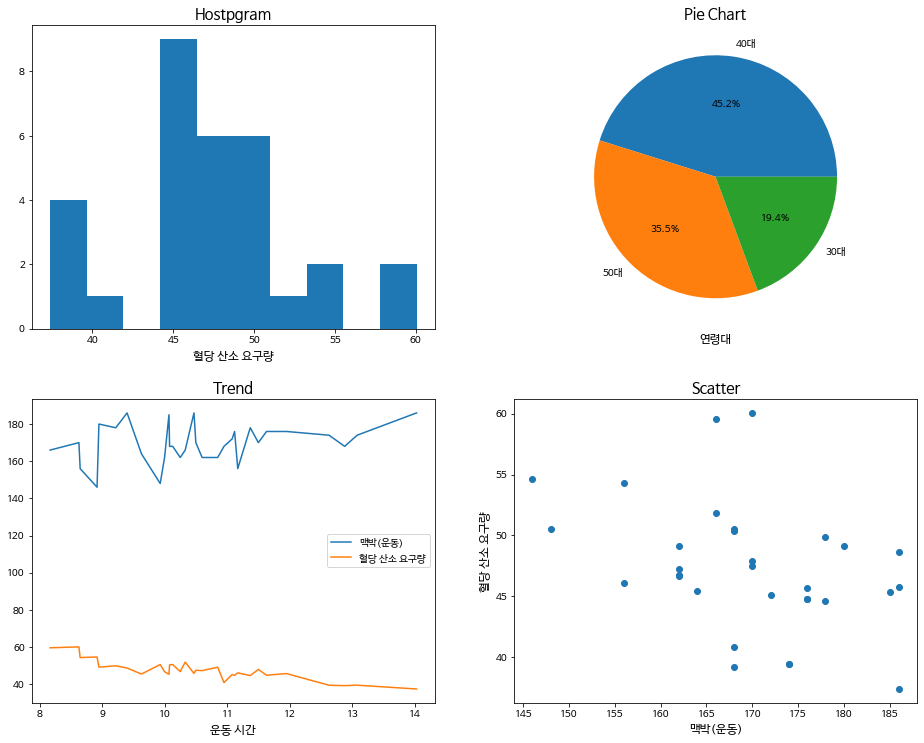

In [78]:
# Dashboard 생성
df_count = df_fitness["AGEGROUP"].value_counts() # Pie Chart를 위한 집계 데이터
fig, axes = plt.subplots(nrows = 2, ncols = 2, figsize = (13, 10)) # (2, 2) 4분할, 4개의 그래프 생성
plt.tight_layout(w_pad = 5, h_pad = 5) # w_pad:열 사이 간격, h_pad:행 사이 간격

# Histogram
axes[0,0].hist(df_fitness["OXY"]) #[0,0] 위치에 Histogram 생성
axes[0,0].set_title("Hostpgram", fontsize = 15) # 제목 설정, 글자 크기 15
axes[0,0].set_xlabel("혈당 산소 요구량", fontsize = 12) # x축 label 지정

# Pie Chart
axes[0,1].pie(df_count, labels = df_count.index.tolist(), autopct = "%.1f%%") # [0,1] 위치에 Pie Chart 생성
axes[0,1].set_title("Pie Chart", fontsize = 15)
axes[0,1].set_xlabel("연령대", fontsize = 12)

# Trend
axes[1,0].plot("RUNTIME", "RUNPULSE", data = df_fitness, label = "맥박(운동)") #[1,0] x축:운동 시간, y축:맥박(운동)
axes[1,0].plot("RUNTIME", "OXY", data =df_fitness, label = "혈당 산소 요구량") # x축: 운동시간, y축 산소요구량
axes[1,0].set_title("Trend", fontsize = 15)
axes[1,0].set_xlabel("운동 시간", fontsize = 12)
axes[1,0].legend() # 범례 표시

# Scatter
axes[1,1].scatter("RUNPULSE", "OXY", data = df_fitness) # [1,1]위치에 산점도 표시, x축: 맥박(운동), y축: 산소 요구량
axes[1,1].set_title("Scatter", fontsize = 15)
axes[1,1].set_xlabel("맥박(운동)", fontsize = 12)
axes[1,1].set_ylabel("혈당 산소 요구량", fontsize = 12)


# 종합실습